### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_clean = application_df.drop(['EIN','NAME'], axis=1)  # axis=1 means drop the columns
df_clean.head()
df_original = df_clean.copy()

In [225]:
# Determine the number of unique values in each column.
df_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [226]:
# Look at APPLICATION_TYPE value counts for binning
df_clean['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

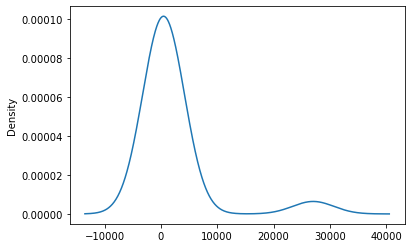

In [227]:
# Visualize the value counts of APPLICATION_TYPE
df_clean['APPLICATION_TYPE'].value_counts().plot.density()

In [228]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_clean['APPLICATION_TYPE'].value_counts() < 100
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_clean.APPLICATION_TYPE = df_clean.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_clean.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')
#application_df.tail()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [229]:
# Look at CLASSIFICATION value counts for binning
df_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [230]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_clean['CLASSIFICATION'].value_counts() < 100
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_clean.CLASSIFICATION = df_clean.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_clean.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [231]:
# Generate our categorical variable lists
application_cat = df_clean.select_dtypes(include=['object']).columns.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [232]:
df_clean[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [233]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
# Merge one-hot encoded features and drop the originals
df_application = df_clean.merge(encode_df, left_index=True, right_index=True)
df_application.drop(application_cat, 1, inplace=True)
df_application.head()

<ipython-input-234-024d8c5d6c36>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application.drop(application_cat, 1, inplace=True)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [235]:
# Split our preprocessed data into our features and target arrays
y = df_application["IS_SUCCESSFUL"].values
X = df_application.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2)

In [236]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [237]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1st attempt to optimize: optimize the Model - Target Accuracy better than 72%

In [241]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
no_of_nodes_layer1 = int(no_of_features * 0.50)
no_of_nodes_layer2 = int(no_of_features * 0.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))

# 2 hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu', input_dim=no_of_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn.summary()

43
21
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 21)                924       
                                                                 
 dense_15 (Dense)            (None, 10)                220       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,155
Trainable params: 1,155
Non-trainable params: 0
_________________________________________________________________


In [242]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [243]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [244]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs=100,verbose=1)

Epoch 1/100
858/858 [==============================] - 1s 836us/step - loss: 0.5993 - accuracy: 0.6947
Epoch 2/100
858/858 [==============================] - 1s 832us/step - loss: 0.5627 - accuracy: 0.7264
Epoch 3/100
858/858 [==============================] - 1s 862us/step - loss: 0.5581 - accuracy: 0.7274
Epoch 4/100
858/858 [==============================] - 1s 831us/step - loss: 0.5563 - accuracy: 0.7268
Epoch 5/100
858/858 [==============================] - 1s 841us/step - loss: 0.5545 - accuracy: 0.7281
Epoch 6/100
858/858 [==============================] - 1s 837us/step - loss: 0.5534 - accuracy: 0.7277
Epoch 7/100
858/858 [==============================] - 1s 848us/step - loss: 0.5530 - accuracy: 0.7295
Epoch 8/100
858/858 [==============================] - 1s 844us/step - loss: 0.5517 - accuracy: 0.7299
Epoch 9/100
858/858 [==============================] - 1s 828us/step - loss: 0.5513 - accuracy: 0.7295
Epoch 10/100
858/858 [==============================] - 1s 845us/step - l

In [189]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5490 - accuracy: 0.7380 - 186ms/epoch - 864us/step
Loss: 0.5490047335624695, Accuracy: 0.7380466461181641


##### 2nd attempt ####

In [190]:
# Generate our categorical variable lists
df_orig_iter2 = df_original.copy()
application_cat_iter2 = df_orig_iter2.select_dtypes(include=['object']).columns.tolist()
application_cat_iter2

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [191]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_orig_iter2['APPLICATION_TYPE'].value_counts() < 200
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_orig_iter2.APPLICATION_TYPE = df_orig_iter2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [192]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_orig_iter2['CLASSIFICATION'].value_counts() < 200
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_orig_iter2.CLASSIFICATION = df_orig_iter2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [193]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter2[application_cat_iter2]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter2)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [194]:
df_orig_iter2[application_cat_iter2].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            8
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [195]:
# Merge one-hot encoded features and drop the originals
df_application_iter2 = df_orig_iter2.merge(encode_df, left_index=True, right_index=True)
df_application_iter2.drop(application_cat_iter2, 1, inplace=True)
#df_application_iter1.head()
application_cat

<ipython-input-195-dab63d8ddcde>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter2.drop(application_cat_iter2, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [196]:
df_application_iter2.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_

In [197]:
# Split our preprocessed data into our features and target arrays
y2 = df_application_iter2["IS_SUCCESSFUL"].values
X2 = df_application_iter2.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, random_state=50, test_size=0.2)

In [198]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_2 = scaler.fit(X_train_2)

# Scale the data
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

In [199]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_2[0])
no_of_nodes_layer1 = 250
no_of_nodes_layer2 = 150
no_of_nodes_layer3 = 75
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu',input_dim=no_of_features))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer3, activation='relu',input_dim=no_of_features))


# Output layer
nn2.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

45
250
150
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 250)               11500     
                                                                 
 dense_26 (Dense)            (None, 150)               37650     
                                                                 
 dense_27 (Dense)            (None, 75)                11325     
                                                                 
 dense_28 (Dense)            (None, 1)                 76        
                                                                 
Total params: 60,551
Trainable params: 60,551
Non-trainable params: 0
_________________________________________________________________


In [200]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [201]:
# Compile the model
nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
# Train the model
model = nn2.fit(X_train_scaled_2, y_train_2, epochs=100,verbose=1)

Epoch 1/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.7222
Epoch 2/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7272
Epoch 3/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7282
Epoch 4/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7305
Epoch 5/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7304
Epoch 6/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7299
Epoch 7/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7298
Epoch 8/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7323
Epoch 9/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7317
Epoch 10/500
858/858 [==============================] - 1s 1ms/step - loss: 0.5484 - accura

In [203]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled_2,y_test_2,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 699us/step - loss: 0.7457 - accuracy: 0.7389
Loss: 0.7456725239753723, Accuracy: 0.7389212846755981


####3rd attempt ####

### 3rd attempt to optimize: optimize the Model - Target Accuracy better than 74%

### 4th attempt to optimize: optimize the Model - Target Accuracy better than 74%

### 5th attempt to optimize: optimize the Model - Target Accuracy better than 74%

In [110]:
#copy the dataframe
df_orig_iter5 = df_clean.copy()

# Check to make sure binning was successful
df_orig_iter4.nunique()

APPLICATION_TYPE            10
AFFILIATION                  6
CLASSIFICATION              12
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [111]:
# Determine which values to replace if counts are less than 10
replace_application_indicator_5 = df_orig_iter5['CLASSIFICATION'].value_counts() < 500
# switch the index with values 
replace_application_indicator_5 = pd.Series(replace_application_indicator_5.index.values, index=replace_application_indicator_5 )
# select only values that are less than 10 (aka true values)
replace_application_indicator_5 = replace_application_indicator_5[replace_application_indicator_5.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replace_application_indicator_5:
    df_orig_iter5.APPLICATION_TYPE = df_orig_iter5.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter5.CLASSIFICATION.value_counts()
#print(application_df['APPLICATION_TYPE']!='Othe

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [112]:
df_orig_iter4.nunique()

APPLICATION_TYPE            10
AFFILIATION                  6
CLASSIFICATION              12
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [113]:
# Generate our categorical variable lists
application_cat_iter5 = df_orig_iter5.select_dtypes(include=['object']).columns.tolist()
application_cat_iter5.remove('APPLICATION_TYPE')
application_cat_iter5

['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [114]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter5[application_cat_iter5]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter5)
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
df_orig_iter4[application_cat_iter5].nunique()

AFFILIATION                6
CLASSIFICATION            12
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [116]:
# Merge one-hot encoded features and drop the originals
df_application_iter5 = df_orig_iter5.merge(encode_df, left_index=True, right_index=True)
df_application_iter5.drop(application_cat_iter5, 1, inplace=True)
#df_application_iter1.head()
application_cat_iter5

<ipython-input-116-c1071648bef7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter5.drop(application_cat_iter5, 1, inplace=True)


['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [117]:
df_application_iter5.columns

Index(['APPLICATION_TYPE', 'STATUS', 'ASK_AMT', 'IS_SUCCESSFUL',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=101)

In [118]:
# Split our preprocessed data into our features and target arrays
y5 = df_application_iter5["IS_SUCCESSFUL"].values
df_application_iter5.drop(["APPLICATION_TYPE"], axis=1,inplace=True)
X5 = df_application_iter5.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X5, y5, random_state=50, test_size=0.2)

In [119]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_5 = scaler.fit(X_train_5)

# Scale the data
X_train_scaled_5 = X_scaler_5.transform(X_train_5)
X_test_scaled_5 = X_scaler_5.transform(X_test_5)

In [120]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_5[0])
no_of_nodes_layer1 = int(no_of_features * 1.5)
no_of_nodes_layer2 = int(no_of_features * 1.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu'))


# Output layer
nn5.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn5.summary()

99
148
123
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 148)               14800     
                                                                 
 dense_19 (Dense)            (None, 123)               18327     
                                                                 
 dense_20 (Dense)            (None, 1)                 124       
                                                                 
Total params: 33,251
Trainable params: 33,251
Non-trainable params: 0
_________________________________________________________________


In [121]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("AlphabetSoupCharity_Optimization.h5", verbose=1, save_weights_only=True, save_freq=5)

In [122]:
# Compile the model
nn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
# Train the model
model = nn5.fit(X_train_scaled_5, y_train_5, epochs=100,verbose=1)

Epoch 1/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6943
Epoch 2/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.7067
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5788 - accuracy: 0.7067
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5768 - accuracy: 0.7092
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5757 - accuracy: 0.7106
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5747 - accuracy: 0.7103
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5741 - accuracy: 0.7111
Epoch 8/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7096
Epoch 9/100
858/858 [==============================] - 1s 992us/step - loss: 0.5723 - accuracy: 0.7111
Epoch 10/100
858/858 [==============================] - 1s 982us/step - loss: 0.5723 - ac

In [125]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled_5,y_test_5,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 615us/step - loss: 0.7004 - accuracy: 0.7169
Loss: 0.7004460096359253, Accuracy: 0.716909646987915
